<a href="https://colab.research.google.com/github/subhaz18/CTS_Hackathon/blob/main/CTS_Healthcare_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imbalanced-learn

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
train_labels=pd.read_csv('/content/drive/MyDrive/CTS_HACKTHON_DATASET/Train-1542865627584.csv')
test_labels=pd.read_csv('/content/drive/MyDrive/CTS_HACKTHON_DATASET/Test-1542969243754.csv')
train_beneficiary=pd.read_csv('/content/drive/MyDrive/CTS_HACKTHON_DATASET/Train_Beneficiarydata-1542865627584.csv')
train_impatient=pd.read_csv('/content/drive/MyDrive/CTS_HACKTHON_DATASET/Train_Inpatientdata-1542865627584.csv')


In [ ]:
# Try reading the file with the 'error_bad_lines' parameter set to False
train_outpatient = pd.read_csv('/content/drive/MyDrive/CTS_HACKTHON_DATASET/Train_Outpatientdata-1542865627584.csv', on_bad_lines='skip')
test_beneficiary = pd.read_csv('/content/drive/MyDrive/CTS_HACKTHON_DATASET/Test_Beneficiarydata-1542969243754.csv', on_bad_lines='skip')
test_outpatient = pd.read_csv('/content/drive/MyDrive/CTS_HACKTHON_DATASET/Test_Outpatientdata-1542969243754.csv', on_bad_lines='skip')
test_impatient = pd.read_csv('/content/drive/MyDrive/CTS_HACKTHON_DATASET/Test_Inpatientdata-1542969243754.csv', on_bad_lines='skip')
# If you want to investigate the problematic lines instead of skipping them:
#try:
 #   train_outpatient = pd.read_csv('/content/datasets/Train_Outpatientdata-1542865627584.csv')
#except pd.errors.ParserError as e:
 #   print(f"Error encountered: {e}")
    # Examine the lines around row 344489 in your CSV file to fix the issue.

In [ ]:
train_labels.head(50)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
5,PRV51008,No
6,PRV51011,No
7,PRV51012,No
8,PRV51013,No
9,PRV51014,No


In [ ]:
test_labels.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [ ]:
train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [ ]:
train_impatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [ ]:
test_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


In [ ]:
test_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
test_impatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_Allpatientdata=pd.merge(train_outpatient,train_impatient,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [ ]:
train_Allpatientdata.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaN,NaN,NaN
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,0.0,79380,NaN,NaN,NaN
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaN,NaN,NaN


In [ ]:
train_Allpatientdata=pd.merge(train_Allpatientdata,train_beneficiary,on='BeneID')

In [ ]:
train_Allpatientdata.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760


In [ ]:
train_Allpatientdata=pd.merge(train_Allpatientdata,train_labels,on='Provider')

In [ ]:
train_Allpatientdata.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes


In [ ]:
train_Allpatientdata.shape

(558211, 55)

In [ ]:
train_Allpatientdata.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes


In [ ]:
train_Allpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

In [ ]:
a=(train_Allpatientdata["AttendingPhysician"]==train_Allpatientdata["OperatingPhysician"])
b=(train_Allpatientdata["OperatingPhysician"]==train_Allpatientdata["OtherPhysician"])
c=(train_Allpatientdata["AttendingPhysician"]==train_Allpatientdata["OtherPhysician"])

print(a.sum())
print(b.sum())
print(c.sum())
print( (a+b).sum() ) # atten=oper=other

61164
15884
85258
63872


In [ ]:
def physician_same(row):
    atten_oper=row["AttendingPhysician"]==row["OperatingPhysician"]
    oper_other=row["OperatingPhysician"]==row["OtherPhysician"]
    atten_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if atten_oper==True and oper_other==True:# atten = oper = other
        return 0
    elif atten_oper==True and oper_other==False:# atten = oper != other
        return 1
    elif atten_oper==False and oper_other==True:# atten != oper = other
        return 2
    else:# atten != oper != other
        return 3

phy_same=train_Allpatientdata.apply(physician_same,axis=1)

In [ ]:
train_Allpatientdata["phy_same"]=phy_same

In [ ]:
def physician_count(row,list_count):
    count=0
    for col in list_count:
        if pd.isnull(row[col]):
            continue
        else:
            count+=1
    return count

list_count=["AttendingPhysician","OperatingPhysician","OtherPhysician"]
phy_count=train_Allpatientdata.apply(physician_count,axis=1,args=(list_count,))

In [ ]:
train_Allpatientdata["phy_count"]=phy_count

In [ ]:
train_Allpatientdata.head(50)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,phy_same,phy_count
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,0,0,30,50,Yes,3,1
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,2,0,0,1810,760,Yes,3,1
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,2,0,0,1810,760,Yes,3,1
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,2,0,0,1810,760,Yes,3,1
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,2,0,0,1810,760,Yes,3,1
5,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200,PHY346833,NaN,PHY346833,72290,...,1,1,2,0,0,1810,760,Yes,3,2
6,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60,PHY372925,NaN,PHY311407,71856,...,1,1,2,0,0,1810,760,Yes,3,2
7,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500,PHY412904,NaN,PHY396473,7237,...,1,1,2,0,0,1810,760,Yes,3,2
8,BENE11004,CLM564511,2009-09-06,2009-09-06,PRV56011,400,PHY396851,NaN,NaN,9986,...,1,1,2,0,0,1810,760,Yes,3,1
9,BENE11004,CLM720523,2009-12-09,2009-12-09,PRV56011,100,PHY409445,NaN,PHY365422,70700,...,1,1,2,0,0,1810,760,Yes,3,2


In [ ]:
startdate= pd.to_datetime( train_Allpatientdata["ClaimStartDt"] )
enddate= pd.to_datetime( train_Allpatientdata["ClaimEndDt"] )

period = ( enddate - startdate).dt.days
train_Allpatientdata["period"] = period

In [ ]:
train_Allpatientdata.head(50)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,phy_same,phy_count,period
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,0,0,30,50,Yes,3,1,0
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,2,0,0,1810,760,Yes,3,1,0
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,2,0,0,1810,760,Yes,3,1,0
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,2,0,0,1810,760,Yes,3,1,0
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,2,0,0,1810,760,Yes,3,1,0
5,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200,PHY346833,NaN,PHY346833,72290,...,1,2,0,0,1810,760,Yes,3,2,0
6,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60,PHY372925,NaN,PHY311407,71856,...,1,2,0,0,1810,760,Yes,3,2,20
7,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500,PHY412904,NaN,PHY396473,7237,...,1,2,0,0,1810,760,Yes,3,2,12
8,BENE11004,CLM564511,2009-09-06,2009-09-06,PRV56011,400,PHY396851,NaN,NaN,9986,...,1,2,0,0,1810,760,Yes,3,1,0
9,BENE11004,CLM720523,2009-12-09,2009-12-09,PRV56011,100,PHY409445,NaN,PHY365422,70700,...,1,2,0,0,1810,760,Yes,3,2,0


In [ ]:
train_Allpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

In [ ]:
copy1=train_Allpatientdata.copy()

In [ ]:
copy1.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,phy_same,phy_count,period
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,0,0,30,50,Yes,3,1,0
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,2,0,0,1810,760,Yes,3,1,0
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,2,0,0,1810,760,Yes,3,1,0
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,2,0,0,1810,760,Yes,3,1,0
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,2,0,0,1810,760,Yes,3,1,0


In [ ]:
cronic_cols_names=copy1.columns[ copy1.columns.str.startswith("ChronicCond") ]
cronic_cols=copy1[   cronic_cols_names   ]
cronic=cronic_cols.replace({2:0})
copy1[   cronic_cols_names   ]=cronic

In [ ]:
copy1["PotentialFraud"]=copy1["PotentialFraud"].replace({"Yes":1,"No":0})

In [ ]:
copy1["Gender"]=copy1["Gender"].replace({2:0})

In [ ]:
startadmt= pd.to_datetime( copy1["AdmissionDt"] )
enddatadmt= pd.to_datetime( copy1["DischargeDt"] )

periodadmt = ( enddatadmt - startadmt).dt.days
copy1["periodadmt"] = periodadmt
copy1["periodadmt"]=copy1["periodadmt"].fillna(0)

In [ ]:
copy1["RenalDiseaseIndicator"]=copy1["RenalDiseaseIndicator"].replace({"Y":1})

In [ ]:
birthdate=pd.to_datetime(copy1["DOB"])
enddate=pd.to_datetime(copy1["DOD"])

# cheack whether the patient dead or alife
def alife_function(value):
    if value==True:
        return 1
    else:
        return 0
alife = pd.isna(enddate).apply(alife_function)


# get the age of patient
max_date=enddate.dropna().max()
enddate[pd.isna(enddate)]=max_date
period=(((enddate-birthdate).dt.days/356).astype(int))

copy1["age"]=period
copy1["alife"]=alife

In [ ]:
copy1.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,phy_same,phy_count,period,periodadmt,age,alife
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,0,30,50,1,3,1,0,0.0,75,1
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,0,1810,760,1,3,1,0,0.0,89,1
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,0,1810,760,1,3,1,0,0.0,89,1
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,0,1810,760,1,3,1,0,0.0,89,1
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,0,1810,760,1,3,1,0,0.0,89,1


In [ ]:
copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

In [ ]:
def groupby(df,by,vars_to_group,methods,col_ident,as_index=True,agg=False):
    if agg:
        grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].agg(methods)
        cols=['_'.join(col) for col in grouped.columns.values]
        cols=[col_ident+"_"+col for col in cols]
        grouped.columns=cols
        return grouped

    else:
        concat=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(methods[0])
        cols=[ col_ident+"_"+col+"_"+methods[0] for col in concat.columns ]
        concat.columns=cols

        for method in methods[1:]:
            grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(method)
            cols=[col_ident+"_"+col+"_"+method for col in grouped.columns]
            grouped.columns=cols
            concat=pd.concat([concat,grouped],axis=1)

        return concat

In [ ]:
money_cols=["InscClaimAmtReimbursed","DeductibleAmtPaid","NoOfMonths_PartACov","NoOfMonths_PartBCov",
           "IPAnnualReimbursementAmt","IPAnnualDeductibleAmt","OPAnnualReimbursementAmt","OPAnnualDeductibleAmt"]

In [ ]:
provider_money=groupby(copy1,["Provider"],money_cols,["mean","std"],"provider",
                       True,False)

In [ ]:
banel_money=groupby(copy1,["BeneID"],money_cols,["mean","std"],"banel",
                       True,False)

In [ ]:
diag1_money=groupby(copy1,["ClmDiagnosisCode_1"],money_cols,["mean","std"],"diag1",
                       True,False)

In [ ]:
selected_cols_names=["phy_same","phy_count","period","periodadmt","age","alife","Provider","PotentialFraud"]
selected_cols=copy1[selected_cols_names]

In [ ]:
data=pd.concat([selected_cols,provider_money,banel_money,diag1_money],axis=1)

In [ ]:
grouped=data.groupby(by=["Provider","PotentialFraud"]).agg("mean").reset_index()

In [ ]:
grouped

,Provider,PotentialFraud,phy_same,phy_count,period,periodadmt,age,alife,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,...,diag1_OPAnnualReimbursementAmt_mean,diag1_OPAnnualDeductibleAmt_mean,diag1_InscClaimAmtReimbursed_std,diag1_DeductibleAmtPaid_std,diag1_NoOfMonths_PartACov_std,diag1_NoOfMonths_PartBCov_std,diag1_IPAnnualReimbursementAmt_std,diag1_IPAnnualDeductibleAmt_std,diag1_OPAnnualReimbursementAmt_std,diag1_OPAnnualDeductibleAmt_std
0,PRV51001,0,2.960000,1.600000,1.440000,1.000000,80.240000,1.000000,4185.600000,213.600000,...,1804.331094,543.045084,3482.066310,161.353027,0.569945,0.424192,12941.552352,1205.297144,2450.076771,661.506672
1,PRV51003,1,2.439394,1.530303,3.674242,2.424242,71.371212,0.992424,4588.409091,502.166667,...,2422.458599,676.313985,4017.871066,260.257069,0.726572,0.653285,12620.604411,1226.306633,3369.338617,848.213675
2,PRV51004,0,2.818792,1.604027,1.429530,0.000000,73.516779,0.993289,350.134228,2.080537,...,2430.017927,694.246881,1536.290845,113.086257,0.667719,0.577420,11016.516937,1111.592405,2972.377916,808.138208
3,PRV51005,1,2.731330,1.599142,1.088412,0.000000,71.783691,0.996567,241.124464,3.175966,...,2195.953526,630.805985,1234.005090,91.141252,0.657071,0.565930,10021.329572,957.701391,2727.944083,737.419878
4,PRV51007,0,2.736111,1.527778,0.958333,0.222222,70.583333,0.986111,468.194444,45.333333,...,2089.969651,606.550334,1519.425993,103.302166,0.626542,0.520122,10565.761429,1126.358206,2486.827069,682.279276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0,2.892857,1.464286,2.142857,0.000000,75.285714,1.000000,380.000000,4.642857,...,2770.995487,762.684094,924.661538,88.673186,0.717266,0.575517,11706.835391,989.925167,3092.516228,805.101036
5406,PRV57760,0,2.318182,1.681818,0.318182,0.000000,62.318182,1.000000,216.818182,0.000000,...,1857.020747,551.812490,1182.800362,63.746284,0.738778,0.632455,10087.266945,852.726747,2325.052621,667.813928
5407,PRV57761,0,3.000000,1.609756,1.390244,0.000000,73.268293,0.987805,225.243902,4.512195,...,2409.246660,667.100333,1469.587798,89.369298,0.626573,0.503166,9701.587916,956.791480,2864.403847,730.914731
5408,PRV57762,0,3.000000,1.000000,0.000000,0.000000,69.000000,1.000000,1900.000000,0.000000,...,2332.103825,701.530055,926.436661,146.810805,0.939796,0.000000,10836.121659,798.136760,2327.892739,625.238022


In [ ]:
grouped=grouped.fillna(0)

In [ ]:
features=grouped.iloc[:,2:]
labels=grouped.iloc[:,1]

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels = oversample.fit_resample(features, labels)

In [ ]:
scaler = StandardScaler()
featuresstand=scaler.fit_transform(features)

In [ ]:
ff=compute_class_weight(class_weight="balanced",classes=np.unique(labels),y=labels)
cw=dict(zip(np.unique(labels),ff))

featuress,labelss=shuffle(featuresstand,labels)
xtrain,xtest,ytrain,ytest = train_test_split(featuress,labelss,test_size=0.1)

In [ ]:
xtrain=xtrain.astype(np.float32)
xtest=xtest.astype(np.float32)
ytrain=ytrain.astype(np.float32).to_numpy()
ytest=ytest.astype(np.float32).to_numpy()


ytrain=ytrain.reshape(ytrain.shape+(1,))
ytest=ytest.reshape(ytest.shape+(1,))

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(8827, 54)
(981, 54)
(8827, 1)
(981, 1)


In [ ]:
inpt=tf.keras.layers.Input((xtrain.shape[1],))
d1=tf.keras.layers.Dense(256, activation='relu')(inpt)
d1=tf.keras.layers.Dense(128, activation='relu')(d1)

d2=tf.keras.layers.Dense(1,activation="sigmoid")(d1)

nural_network=tf.keras.Model(inputs=inpt,outputs=d2)

In [ ]:
nural_network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                      loss='binary_crossentropy'
                    ,metrics=["accuracy"])

history_combined=nural_network.fit(xtrain,ytrain,validation_data=(xtest,ytest),batch_size=128,epochs=300,
                                  class_weight=cw)

Epoch 1/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6299 - loss: 0.6073 - val_accuracy: 0.7176 - val_loss: 0.5013
Epoch 2/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7521 - loss: 0.4831 - val_accuracy: 0.8033 - val_loss: 0.4340
Epoch 3/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8381 - loss: 0.4128 - val_accuracy: 0.8308 - val_loss: 0.3945
Epoch 4/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8558 - loss: 0.3778 - val_accuracy: 0.8389 - val_loss: 0.3679
Epoch 5/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8681 - loss: 0.3457 - val_accuracy: 0.8451 - val_loss: 0.3521
Epoch 6/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8697 - loss: 0.3272 - val_accuracy: 0.8603 - val_loss: 0.3385
Epoch 7/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8752 - loss: 0.3111 - val_accuracy: 0.8654 - val_loss: 0.3283
Epoch 8/300
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8807 - loss: 0.2980 - val_accuracy: 0.8665 - v

In [ ]:
ytt=nural_network.predict(xtest)
dd=np.round(ytt)
print(classification_report(ytest,dd))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       496
         1.0       0.94      0.99      0.96       485

    accuracy                           0.96       981
   macro avg       0.97      0.96      0.96       981
weighted avg       0.97      0.96      0.96       981



In [ ]:
# prompt: generate code for random forest classifier for the x train ,x test and y train and y test

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Train the model
rf_classifier.fit(xtrain, ytrain.ravel())  # Assuming ytrain is a column vector, ravel() flattens it

# Make predictions on the test set
y_pred = rf_classifier.predict(xtest)

# Evaluate the model
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       496
         1.0       0.93      0.98      0.95       485

    accuracy                           0.95       981
   macro avg       0.95      0.95      0.95       981
weighted avg       0.95      0.95      0.95       981



In [ ]:
# prompt: generate code for xg boost classifier for the x train ,x test and y train and y test

import xgboost as xgb

# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)  # You can adjust hyperparameters

# Train the model
xgb_classifier.fit(xtrain, ytrain.ravel())  # Assuming ytrain is a column vector, ravel() flattens it

# Make predictions on the test set
y_pred = xgb_classifier.predict(xtest)

# Evaluate the model
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       496
         1.0       0.92      0.98      0.95       485

    accuracy                           0.95       981
   macro avg       0.95      0.95      0.95       981
weighted avg       0.95      0.95      0.95       981



In [ ]:
# prompt: generate code for knn classifier for the x train ,x test and y train and y test

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_classifier.fit(xtrain, ytrain.ravel())  # Assuming ytrain is a column vector, ravel() flattens it

# Make predictions on the test set
y_pred = knn_classifier.predict(xtest)

# Evaluate the model
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84       496
         1.0       0.78      1.00      0.88       485

    accuracy                           0.86       981
   macro avg       0.89      0.86      0.86       981
weighted avg       0.89      0.86      0.86       981



In [ ]:
# prompt: generate code for svm classifier for the x train ,x test and y train and y test

from sklearn.svm import SVC

# Initialize the SVM Classifier
svm_classifier = SVC(kernel='linear')  # You can adjust the kernel type and other hyperparameters

# Train the model
svm_classifier.fit(xtrain, ytrain.ravel())  # Assuming ytrain is a column vector, ravel() flattens it

# Make predictions on the test set
y_pred = svm_classifier.predict(xtest)

# Evaluate the model
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

         0.0       0.88      0.75      0.81       496
         1.0       0.78      0.90      0.83       485

    accuracy                           0.82       981
   macro avg       0.83      0.82      0.82       981
weighted avg       0.83      0.82      0.82       981



In [ ]:
# prompt: generate code for linear regression classifier for the x train ,x test and y train and y test

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression Classifier
logreg_classifier = LogisticRegression(random_state=42)  # You can adjust hyperparameters

# Train the model
logreg_classifier.fit(xtrain, ytrain.ravel())  # Assuming ytrain is a column vector, ravel() flattens it

# Make predictions on the test set
y_pred = logreg_classifier.predict(xtest)

# Evaluate the model
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82       496
         1.0       0.80      0.85      0.82       485

    accuracy                           0.82       981
   macro avg       0.82      0.82      0.82       981
weighted avg       0.82      0.82      0.82       981



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# prompt: generate code for logistic regression classifier for the x train ,x test and y train and y test

# Initialize the Logistic Regression Classifier
logreg_classifier = LogisticRegression(random_state=42)  # You can adjust hyperparameters

# Train the model
logreg_classifier.fit(xtrain, ytrain.ravel())  # Assuming ytrain is a column vector, ravel() flattens it

# Make predictions on the test set
y_pred = logreg_classifier.predict(xtest)

# Evaluate the model
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82       496
         1.0       0.80      0.85      0.82       485

    accuracy                           0.82       981
   macro avg       0.82      0.82      0.82       981
weighted avg       0.82      0.82      0.82       981



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# prompt: generate code for decision tree classifier for the x train ,x test and y train and y test

from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters

# Train the model
dt_classifier.fit(xtrain, ytrain.ravel())  # Assuming ytrain is a column vector, ravel() flattens it

# Make predictions on the test set
y_pred = dt_classifier.predict(xtest)

# Evaluate the model
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       496
         1.0       0.89      0.93      0.91       485

    accuracy                           0.91       981
   macro avg       0.91      0.91      0.91       981
weighted avg       0.91      0.91      0.91       981



In [ ]:
# prompt: generate code for naive bayes classifier for the x train ,x test and y train and y test

from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(xtrain, ytrain.ravel())  # Assuming ytrain is a column vector, ravel() flattens it

# Make predictions on the test set
y_pred = nb_classifier.predict(xtest)

# Evaluate the model
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

         0.0       0.94      0.54      0.69       496
         1.0       0.67      0.97      0.79       485

    accuracy                           0.75       981
   macro avg       0.81      0.75      0.74       981
weighted avg       0.81      0.75      0.74       981



31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model	Accuracy	Precision	Recall		F1-Score
----------------------------------------------------------------------
NN	0.9643		0.9377		0.9938		0.9650
RF	0.9521		0.9294		0.9773		0.9528
XGB	0.9490		0.9191		0.9835		0.9502
KNN	0.8614		0.7810		1.0000		0.8770
SVM	0.8236		0.7796		0.8969		0.8341
LR	0.8196		0.7996		0.8474		0.8228
DT	0.9093		0.8913		0.9299		0.9102
GNB	0.7513		0.6729		0.9670		0.7936


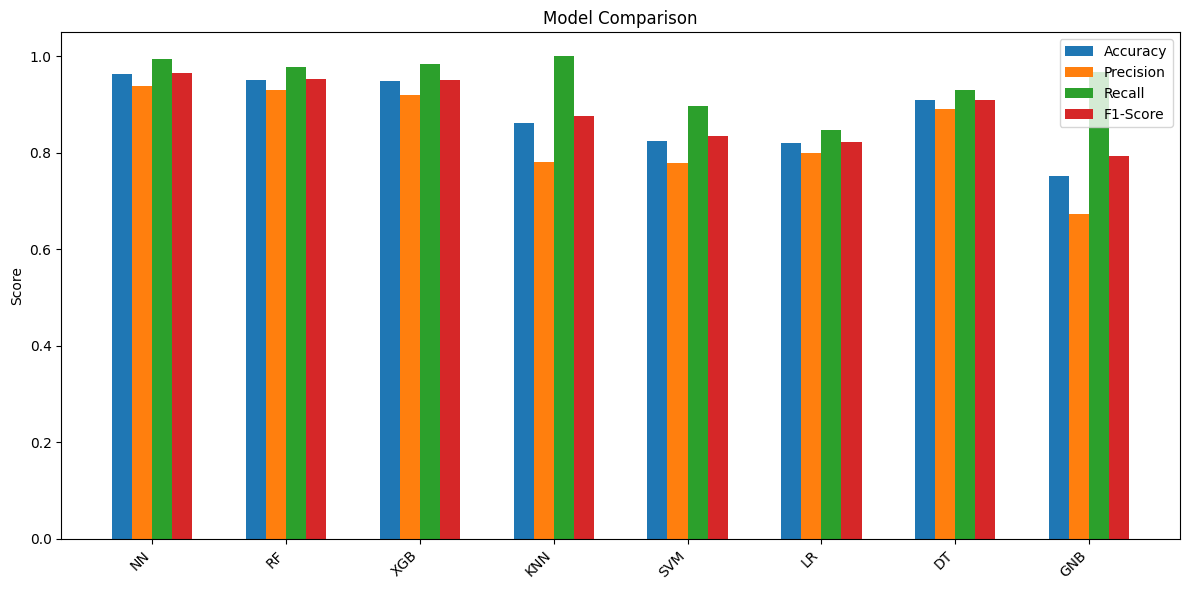

In [ ]:
# prompt: generate a comparison report including graph for all the above classification model results

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store results in a dictionary
results = {}

# Neural Network
ytt = nural_network.predict(xtest)
dd = np.round(ytt)
results['NN'] = {
    'Accuracy': accuracy_score(ytest, dd),
    'Precision': precision_score(ytest, dd),
    'Recall': recall_score(ytest, dd),
    'F1-Score': f1_score(ytest, dd)
}

# Random Forest
y_pred_rf = rf_classifier.predict(xtest)
results['RF'] = {
    'Accuracy': accuracy_score(ytest, y_pred_rf),
    'Precision': precision_score(ytest, y_pred_rf),
    'Recall': recall_score(ytest, y_pred_rf),
    'F1-Score': f1_score(ytest, y_pred_rf)
}

# XGBoost
y_pred_xgb = xgb_classifier.predict(xtest)
results['XGB'] = {
    'Accuracy': accuracy_score(ytest, y_pred_xgb),
    'Precision': precision_score(ytest, y_pred_xgb),
    'Recall': recall_score(ytest, y_pred_xgb),
    'F1-Score': f1_score(ytest, y_pred_xgb)
}

# KNN
y_pred_knn = knn_classifier.predict(xtest)
results['KNN'] = {
    'Accuracy': accuracy_score(ytest, y_pred_knn),
    'Precision': precision_score(ytest, y_pred_knn),
    'Recall': recall_score(ytest, y_pred_knn),
    'F1-Score': f1_score(ytest, y_pred_knn)
}

# SVM
y_pred_svm = svm_classifier.predict(xtest)
results['SVM'] = {
    'Accuracy': accuracy_score(ytest, y_pred_svm),
    'Precision': precision_score(ytest, y_pred_svm),
    'Recall': recall_score(ytest, y_pred_svm),
    'F1-Score': f1_score(ytest, y_pred_svm)
}

# Logistic Regression
y_pred_logreg = logreg_classifier.predict(xtest)
results['LR'] = {
    'Accuracy': accuracy_score(ytest, y_pred_logreg),
    'Precision': precision_score(ytest, y_pred_logreg),
    'Recall': recall_score(ytest, y_pred_logreg),
    'F1-Score': f1_score(ytest, y_pred_logreg)
}

# Decision Tree
y_pred_dt = dt_classifier.predict(xtest)
results['DT'] = {
    'Accuracy': accuracy_score(ytest, y_pred_dt),
    'Precision': precision_score(ytest, y_pred_dt),
    'Recall': recall_score(ytest, y_pred_dt),
    'F1-Score': f1_score(ytest, y_pred_dt)
}

# Gaussian Naive Bayes
y_pred_nb = nb_classifier.predict(xtest)
results['GNB'] = {
    'Accuracy': accuracy_score(ytest, y_pred_nb),
    'Precision': precision_score(ytest, y_pred_nb),
    'Recall': recall_score(ytest, y_pred_nb),
    'F1-Score': f1_score(ytest, y_pred_nb)
}

# Print the results table
print("Model\tAccuracy\tPrecision\tRecall\t\tF1-Score")
print("-" * 70)
for model, metrics in results.items():
    print(f"{model}\t{metrics['Accuracy']:.4f}\t\t{metrics['Precision']:.4f}\t\t{metrics['Recall']:.4f}\t\t{metrics['F1-Score']:.4f}")

# Plot the results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(results))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in results]
    ax.bar(x + i * width, values, width, label=metric)

ax.set_xticks(x + (len(metrics) - 1) * width / 2)
ax.set_xticklabels(results.keys(), rotation=45, ha='right')
ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
# prompt: get user input and predict whether the given input is a potential fraud or not with accuracy rate

# ... (Preceding code remains the same)

# Function to get user input and predict
def predict_fraud():
  input_data = []
  for col in features.columns:
    value = float(input(f"Enter value for {col}: "))
    input_data.append(value)

  input_data = np.array(input_data).reshape(1, -1)
  input_data_standardized = scaler.transform(input_data)  # Standardize input
  prediction = nural_network.predict(input_data_standardized)
  predicted_class = np.round(prediction)[0][0]

  if predicted_class == 1:
    print("Potential Fraud Detected!")
  else:
    print("No Potential Fraud Detected.")

  accuracy = history_combined.history['val_accuracy'][-1]  # Get final validation accuracy
  print(f"Model Accuracy: {accuracy:.2f}")

# Call the function to start prediction
predict_fraud()


Enter value for phy_same: 3
Enter value for phy_count: 0
Enter value for period: 20
Enter value for periodadmt: 0
Enter value for age: 75
Enter value for alife: 1
Enter value for provider_InscClaimAmtReimbursed_mean: 4825
Enter value for provider_DeductibleAmtPaid_mean: 456
Enter value for provider_NoOfMonths_PartACov_mean: 5
Enter value for provider_NoOfMonths_PartBCov_mean: 2
Enter value for provider_IPAnnualReimbursementAmt_mean: 456
Enter value for provider_IPAnnualDeductibleAmt_mean: 566
Enter value for provider_OPAnnualReimbursementAmt_mean: 565
Enter value for provider_OPAnnualDeductibleAmt_mean: 55
Enter value for provider_InscClaimAmtReimbursed_std: 565
Enter value for provider_DeductibleAmtPaid_std: 5656
Enter value for provider_NoOfMonths_PartACov_std: 565
Enter value for provider_NoOfMonths_PartBCov_std: 5665
Enter value for provider_IPAnnualReimbursementAmt_std: 6
Enter value for provider_IPAnnualDeductibleAmt_std: 5
Enter value for provider_OPAnnualReimbursementAmt_std: 6

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: instead of getting these many input ask only the main 4 to 6 input for prediction

# ... (Preceding code remains the same)

# Function to get user input and predict (modified)
def predict_fraud():
  important_features = ["phy_same", "phy_count", "period", "periodadmt", "age"]  # Select important features
  input_data = []
  for col in important_features:
    value = float(input(f"Enter value for {col}: "))
    input_data.append(value)

  # Fill in missing values for other features with their means (you might need to calculate these beforehand)
  mean_values = features.mean().values
  full_input_data = np.zeros_like(mean_values)
  for i, col in enumerate(features.columns):
    if col in important_features:
      index = important_features.index(col)
      full_input_data[i] = input_data[index]
    else:
      full_input_data[i] = mean_values[i]

  full_input_data = full_input_data.reshape(1, -1)
  input_data_standardized = scaler.transform(full_input_data)  # Standardize input
  prediction = nural_network.predict(input_data_standardized)
  predicted_class = np.round(prediction)[0][0]

  if predicted_class == 1:
    print("Potential Fraud Detected!")
  else:
    print("No Potential Fraud Detected.")

  accuracy = history_combined.history['val_accuracy'][-1]  # Get final validation accuracy
  print(f"Model Accuracy: {accuracy:.2f}")

# Call the function to start prediction
predict_fraud()


Enter value for phy_same: 3
Enter value for phy_count: 1
Enter value for period: 20
Enter value for periodadmt: 5
Enter value for age: 45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Potential Fraud Detected.
Model Accuracy: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
